<a href="https://colab.research.google.com/github/abhishek-38/petroleum_ml/blob/main/OilyMLGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1QGX7yWYarF7G4FZLt6se3068KaW0-AA7/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
%config InLineBackend.figure_format = 'png'

File : https://drive.google.com/file/d/1QGX7yWYarF7G4FZLt6se3068KaW0-AA7/view?usp=share_link

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QGX7yWYarF7G4FZLt6se3068KaW0-AA7' -O input.zip

--2023-01-21 06:03:47--  https://docs.google.com/uc?export=download&id=1QGX7yWYarF7G4FZLt6se3068KaW0-AA7
Resolving docs.google.com (docs.google.com)... 108.177.125.102, 108.177.125.139, 108.177.125.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l5kakk7221muq3vp00rpat3mq0bkecvm/1674281025000/04989237414475792611/*/1QGX7yWYarF7G4FZLt6se3068KaW0-AA7?e=download&uuid=dc4941df-90e4-4bb4-a093-ee95facfcaec [following]
--2023-01-21 06:03:49--  https://doc-0o-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l5kakk7221muq3vp00rpat3mq0bkecvm/1674281025000/04989237414475792611/*/1QGX7yWYarF7G4FZLt6se3068KaW0-AA7?e=download&uuid=dc4941df-90e4-4bb4-a093-ee95facfcaec
Resolving doc-0o-a0-docs.googleusercontent.com (doc-0o-a0-docs.googleusercontent.com)... 142.251.8.132, 2404:68

In [ ]:
!unzip -q input.zip

In [ ]:
train = pd.read_csv("/content/OILYMLgo/train.csv")

train_dtc = train.copy()
train_dts = train.copy()

In [ ]:
train.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [ ]:
test = pd.read_csv("/content/OILYMLgo/test.csv")


In [ ]:
test.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982


In [ ]:
sample = pd.read_csv('/content/OILYMLgo/sample_submission.csv')

In [ ]:
sample.head()

,DTC,DTS
0,100,200
1,100,200
2,100,200
3,100,200
4,100,200


In [ ]:
# graph a few of them
# get correlation
# pick best features
# do some feature engineering
# apply light gbm regressor


In [ ]:
train.shape


(30143, 9)

In [ ]:
test.shape

(11088, 7)

In [ ]:
train.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [ ]:
ColA = ['CAL','CNC','GR','HRD','HRM','PE','ZDEN']

for col in train.columns.to_list():
    train = train[train[col] != -999]

for col in ColA + ['DTC']:
    train_dtc = train_dtc[train_dtc[col] != -999]

for col in ColA + ['DTS']:
    train_dts = train_dts[train_dts[col] != -999]

In [ ]:
train.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [ ]:
test.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
count,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000
mean,8.634049,0.158501,28.966414,4.028372,106.752210,7.353522,2.475884
std,0.044064,0.091298,43.648163,7.198112,2374.620246,1.239075,0.149440
min,8.500000,0.009800,0.852000,0.083900,0.102700,4.760800,2.033400
25%,8.625000,0.091700,8.449450,1.760775,1.865575,6.528075,2.378175
50%,8.625000,0.128300,18.168650,2.758900,3.176950,7.881700,2.533600
75%,8.671900,0.213500,36.470725,4.539675,5.034600,8.308325,2.581800
max,8.875000,0.559400,1124.442000,202.233000,62290.769500,13.840700,3.024800


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20525 entries, 573 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     20525 non-null  float64
 1   CNC     20525 non-null  float64
 2   GR      20525 non-null  float64
 3   HRD     20525 non-null  float64
 4   HRM     20525 non-null  float64
 5   PE      20525 non-null  float64
 6   ZDEN    20525 non-null  float64
 7   DTC     20525 non-null  float64
 8   DTS     20525 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [ ]:
from itertools import combinations
def makeNewFeatures_Diff(train_data, colA):
        for col1, col2 in combinations(colA, 2):
            train_data['Diff_'+ col1 + "_" + col2] = train_data[col1] - train_data[col2]
            # train_data['HarmonicMean_'+ col1 + "_" + col2] = 2*train_data[col1] * train_data[col2]/(train_data[col1] + train_data[col2])
            # train_data['GeometricMean_'+ col1 + "_" + col2] = np.sqrt(train_data[col1] * train_data[col2])
            # train_data['ArithmeticMean_'+ col1 + "_" + col2] = (train_data[col1] + train_data[col2])/2
            # train_data['Strange_'+ col1 + "_" + col2] = (train_data['ArithmeticMean_'+ col1 + "_" + col2] - train_data['HarmonicMean_'+ col1 + "_" + col2] )/ (train_data['ArithmeticMean_'+ col1 + "_" + col2] - train_data['GeometricMean_'+ col1 + "_" + col2])


            # if len(train_data[train_data[col2] == 0]) == 0:
            #     train_data['Div_'+ col1 + "_" + col2] = train_data[col1] / train_data[col2]

In [ ]:
ColA = ['CAL','CNC','GR','HRD','HRM','PE','ZDEN']
makeNewFeatures_Diff(train, ColA)
makeNewFeatures_Diff(train_dtc, ColA)
makeNewFeatures_Diff(train_dts, ColA)
makeNewFeatures_Diff(test, ColA)

In [ ]:
train.head()


,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS,Diff_CAL_CNC,...,Diff_GR_HRD,Diff_GR_HRM,Diff_GR_PE,Diff_GR_ZDEN,Diff_HRD_HRM,Diff_HRD_PE,Diff_HRD_ZDEN,Diff_HRM_PE,Diff_HRM_ZDEN,Diff_PE_ZDEN
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611,306.8676,14.3651,...,55.2077,55.2177,29.2471,54.8393,0.0100,-25.9606,-0.3684,-25.9706,-0.3784,25.5922
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726,305.8347,14.4604,...,61.1121,61.5220,35.0529,60.7538,0.4099,-26.0592,-0.3583,-26.4691,-0.7682,25.7009
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528,305.9089,14.1908,...,62.4753,63.0351,37.9249,62.0638,0.5598,-24.5504,-0.4115,-25.1102,-0.9713,24.1389
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362,305.1737,13.8009,...,61.0090,61.5531,43.4509,60.5925,0.5441,-17.5581,-0.4165,-18.1022,-0.9606,17.1416
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774,304.4476,13.5694,...,58.8888,59.3983,50.9865,58.5283,0.5095,-7.9023,-0.3605,-8.4118,-0.8700,7.5418


In [ ]:
# corr_map = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
# plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold


In [ ]:
# !pip install catboost

In [ ]:
# from catboost import CatBoostRegressor
# import catboost
from sklearn import metrics

In [ ]:
train

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS,Diff_CAL_CNC,...,Diff_GR_HRD,Diff_GR_HRM,Diff_GR_PE,Diff_GR_ZDEN,Diff_HRD_HRM,Diff_HRD_PE,Diff_HRD_ZDEN,Diff_HRM_PE,Diff_HRM_ZDEN,Diff_PE_ZDEN
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611,306.8676,14.3651,...,55.2077,55.2177,29.2471,54.8393,0.0100,-25.9606,-0.3684,-25.9706,-0.3784,25.5922
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726,305.8347,14.4604,...,61.1121,61.5220,35.0529,60.7538,0.4099,-26.0592,-0.3583,-26.4691,-0.7682,25.7009
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528,305.9089,14.1908,...,62.4753,63.0351,37.9249,62.0638,0.5598,-24.5504,-0.4115,-25.1102,-0.9713,24.1389
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362,305.1737,13.8009,...,61.0090,61.5531,43.4509,60.5925,0.5441,-17.5581,-0.4165,-18.1022,-0.9606,17.1416
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774,304.4476,13.5694,...,58.8888,59.3983,50.9865,58.5283,0.5095,-7.9023,-0.3605,-8.4118,-0.8700,7.5418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30138,8.6719,0.1879,119.9486,2.5130,2.5187,0.0597,2.6240,74.2133,131.7747,8.4840,...,117.4356,117.4299,119.8889,117.3246,-0.0057,2.4533,-0.1110,2.4590,-0.1053,-2.5643
30139,8.6719,0.1825,122.5286,2.5011,2.4818,0.0582,2.6194,74.3503,132.2201,8.4894,...,120.0275,120.0468,122.4704,119.9092,0.0193,2.4429,-0.1183,2.4236,-0.1376,-2.5612
30140,8.6797,0.1774,122.0544,2.5010,2.4717,0.0571,2.6169,74.4752,132.5171,8.5023,...,119.5534,119.5827,121.9973,119.4375,0.0293,2.4439,-0.1159,2.4146,-0.1452,-2.5598
30141,8.6719,0.1744,120.6518,2.5150,2.5007,0.0562,2.6159,74.5917,132.7115,8.4975,...,118.1368,118.1511,120.5956,118.0359,0.0143,2.4588,-0.1009,2.4445,-0.1152,-2.5597


In [ ]:
train_data, val = train_test_split(train, train_size= 0.8, shuffle = True)
train_data_dtc, val_dtc = train_test_split(train_dtc, train_size= 0.8, shuffle = True)
train_data_dts, val_dts = train_test_split(train_dts, train_size= 0.8, shuffle = True)

In [ ]:
train_x = train_data.drop(['DTC', 'DTS'], axis = 1)
train_y = train_data[['DTC', 'DTS']]
val_x = val.drop(['DTC', 'DTS'], axis = 1)
val_y = val[['DTC', 'DTS']]

train_x_dtc = train_data_dtc.drop(['DTC', 'DTS'], axis = 1)
train_y_dtc = train_data_dtc[['DTC', 'DTS']]
val_x_dtc = val_dtc.drop(['DTC', 'DTS'], axis = 1)
val_y_dtc = val_dtc[['DTC', 'DTS']]

train_x_dts = train_data_dts.drop(['DTC', 'DTS'], axis = 1)
train_y_dts = train_data_dts[['DTC', 'DTS']]
val_x_dts = val_dts.drop(['DTC', 'DTS'], axis = 1)
val_y_dts = val_dts[['DTC', 'DTS']]

In [ ]:
model_dtc = lgb.LGBMRegressor(
    n_estimators = 1200,
    learning_rate= 0.05,
    reg_alpha=0.03,
    reg_lambda=0.001,
)
model_dts = lgb.LGBMRegressor(
    n_estimators = 1200,
    learning_rate= 0.05,
    reg_alpha=0.03,
    reg_lambda=0.001
)


In [ ]:
model_dtc.fit(
        X = train_x_dtc,
        y = train_y_dtc['DTC'],
        eval_set = (val_x_dtc, val_y_dtc['DTC']),
        eval_metric='rmse',
        verbose = 200,
        early_stopping_rounds=100
        )

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 3.75496	valid_0's l2: 14.0997
[400]	valid_0's rmse: 3.55902	valid_0's l2: 12.6666
[600]	valid_0's rmse: 3.45823	valid_0's l2: 11.9593
[800]	valid_0's rmse: 3.38281	valid_0's l2: 11.4434
[1000]	valid_0's rmse: 3.32886	valid_0's l2: 11.0813
[1200]	valid_0's rmse: 3.29734	valid_0's l2: 10.8724
Did not meet early stopping. Best iteration is:
[1199]	valid_0's rmse: 3.29729	valid_0's l2: 10.8722


LGBMRegressor(learning_rate=0.05, n_estimators=1200, reg_alpha=0.03,
              reg_lambda=0.001)

In [ ]:
# train_x['DTC'] = model_dtc.predict(train_x)
# val_x['DTC'] = model_dtc.predict(val_x)
# makeNewFeatures_Diff(train, ColA + ['DTC'])

# train_data, val = train_test_split(train, train_size= 0.8, shuffle = True)

# train_x = train_data.drop(['DTS'], axis = 1)
# train_y = train_data[['DTS']]
# val_x = val.drop(['DTS'], axis = 1)
# val_y = val[['DTS']]

In [ ]:
model_dts.fit(
        X = train_x_dts,
        y = train_y_dts['DTS'],
        eval_set = (val_x_dts, val_y_dts['DTS']),
        eval_metric='rmse',
        verbose = 200,
        early_stopping_rounds=100
        )

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 9.45762	valid_0's l2: 89.4465
[400]	valid_0's rmse: 8.96593	valid_0's l2: 80.3878
[600]	valid_0's rmse: 8.71828	valid_0's l2: 76.0083
[800]	valid_0's rmse: 8.54225	valid_0's l2: 72.9701
[1000]	valid_0's rmse: 8.44699	valid_0's l2: 71.3516
[1200]	valid_0's rmse: 8.38662	valid_0's l2: 70.3354
Did not meet early stopping. Best iteration is:
[1200]	valid_0's rmse: 8.38662	valid_0's l2: 70.3354


LGBMRegressor(learning_rate=0.05, n_estimators=1200, reg_alpha=0.03,
              reg_lambda=0.001)

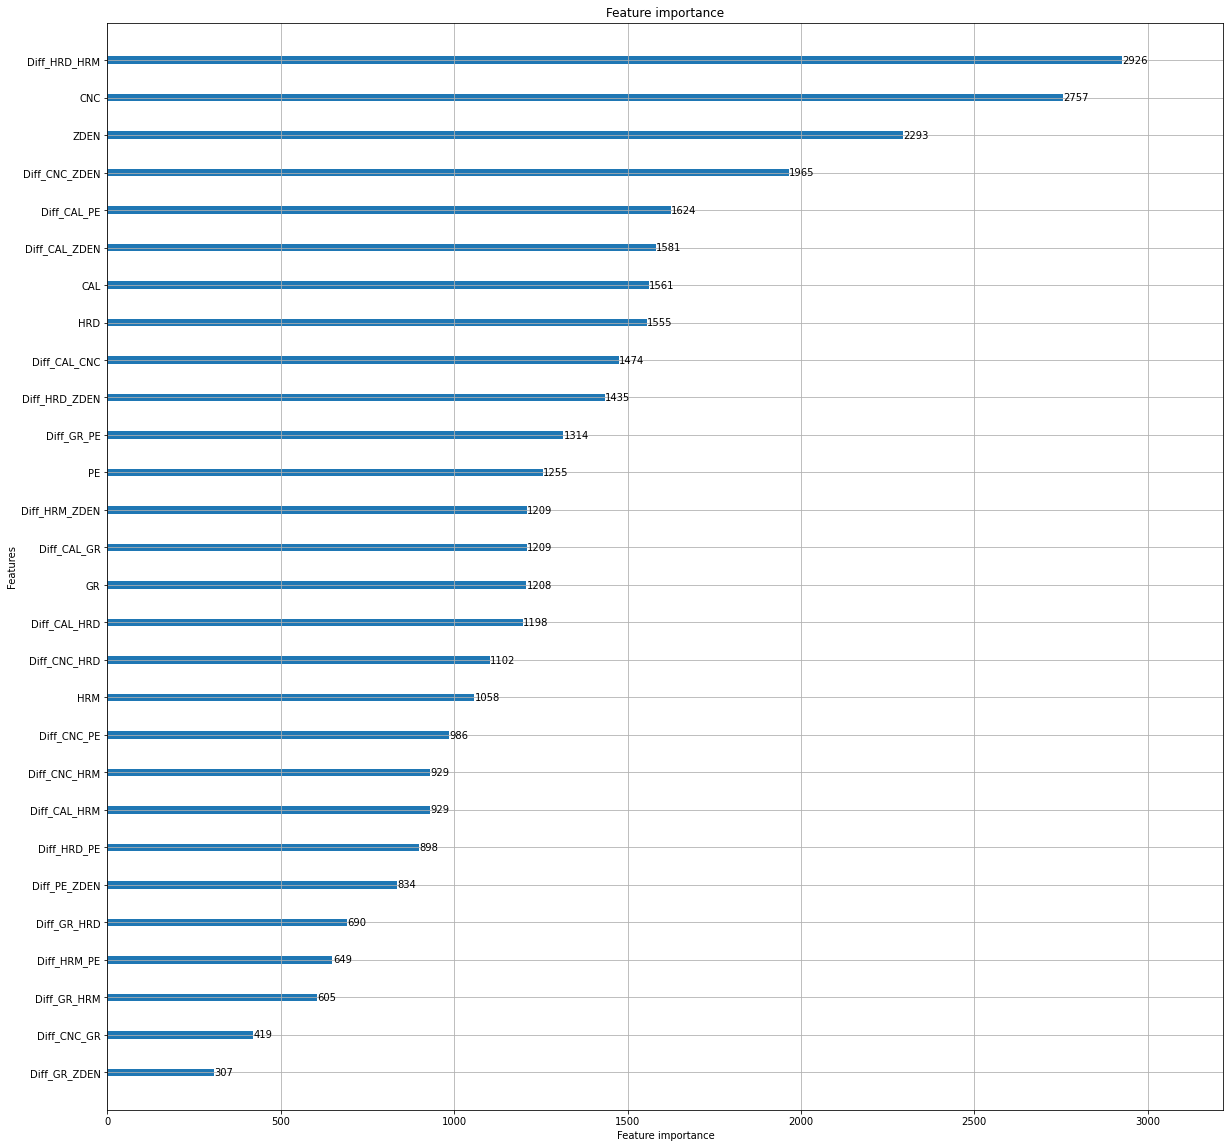

In [ ]:
lgb.plot_importance(model_dtc, figsize = (20,20))

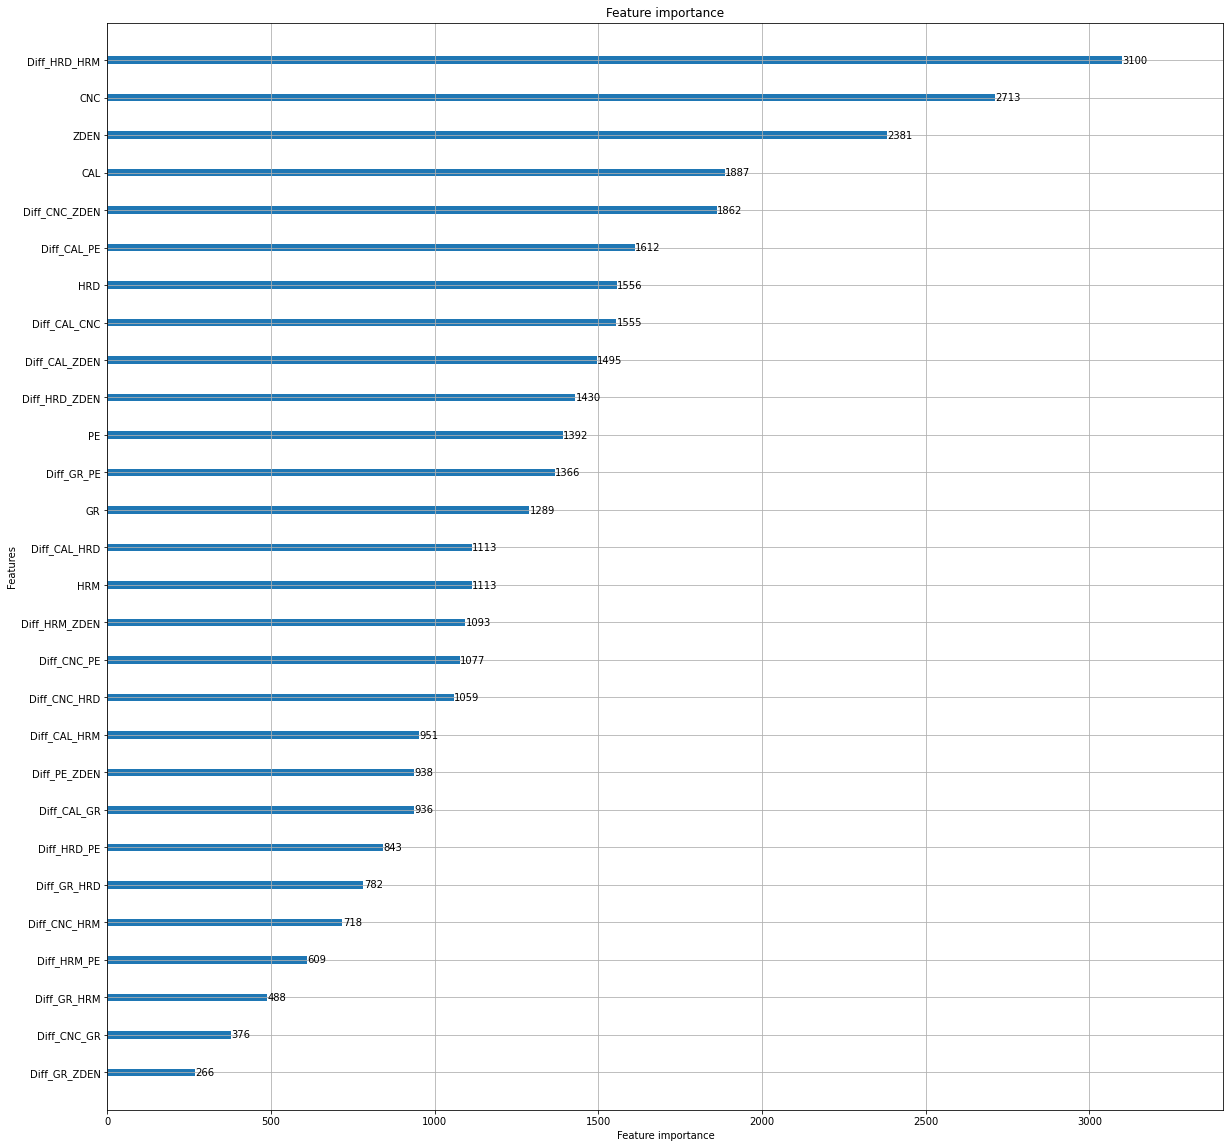

In [ ]:
lgb.plot_importance(model_dts, figsize = (20,20))

In [ ]:
bad_cols = [x for x in test.columns.to_list() if x not in train.columns.to_list()]

In [ ]:
[x for x in train.columns.to_list() if x not in test.columns.to_list()]

['DTC', 'DTS']

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['DTC'] = model_dtc.predict(test.drop(bad_cols, axis =1))
# test['DTC'] = submission['DTC']

# makeNewFeatures_Diff(test, ColA + ['DTC'])
submission['DTS'] = model_dts.predict(test.drop(bad_cols, axis =1))

In [ ]:
submission

,DTC,DTS
0,109.461839,212.197767
1,109.732446,217.514073
2,115.600926,219.943623
3,114.303990,216.778920
4,111.002827,213.477069
...,...,...
11083,92.314238,165.290293
11084,89.722195,158.175316
11085,91.812899,150.582727
11086,93.887594,155.403500


In [ ]:
submission.describe()

,DTC,DTS
count,11088.000000,11088.000000
mean,76.930878,141.955189
std,14.581475,30.496042
min,55.442495,105.899919
25%,65.739845,121.225975
50%,71.384379,129.582485
75%,85.227901,155.415503
max,122.570290,254.901339


In [ ]:
submission['DTC']

0        109.461839
1        109.732446
2        115.600926
3        114.303990
4        111.002827
            ...    
11083     92.314238
11084     89.722195
11085     91.812899
11086     93.887594
11087     94.666074
Name: DTC, Length: 11088, dtype: float64

In [ ]:
!wget -O final.csv https://raw.githubusercontent.com/pddasig/Machine-Learning-Competition-2020/master/real_test_result.csv

--2023-01-21 06:23:59--  https://raw.githubusercontent.com/pddasig/Machine-Learning-Competition-2020/master/real_test_result.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193080 (189K) [text/plain]
Saving to: ‘final.csv’

final.csv           100%[===================>] 188.55K  --.-KB/s    in 0.03s   

2023-01-21 06:23:59 (6.28 MB/s) - ‘final.csv’ saved [193080/193080]



In [ ]:
final = pd.read_csv('/content/final.csv')

In [ ]:
final.columns.to_list()

['DTC    ', 'DTS  ']

In [ ]:
final.head()

,DTC,DTS
0,107.0669,261.0363
1,107.8095,260.1601
2,108.2305,261.0667
3,108.4281,262.5100
4,108.2227,263.3599


In [ ]:
from sklearn.metrics import mean_squared_error

RMSE_0 = np.sqrt(mean_squared_error(final['DTC    '], submission['DTC']))
RMSE_0

4.8147612809083675

In [ ]:
RMSE_1 = np.sqrt(mean_squared_error(final['DTS  '], submission['DTS']))
RMSE_1

22.81602938092548

In [ ]:
net = np.sqrt(((RMSE_0**2 + RMSE_1**2)/2))
net

16.48867979711216

In [ ]:
submission.to_csv('best_oilyMLGO.csv', index = False)